# <center>Deaths in Mexico</center>
*Defunciones Datos Abiertos, Registro de defunciones 2019,2020,2021, Dirección General de Información en Salud. Consultado en http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_defunciones_gobmx.html el 2022-12-19*

*Licencia libre uso MX
https://datos.gob.mx/libreusomx*

# 1. Import necessary libraries

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# 2. Read dataset

In [2]:
# Read 'defunciones_mx.csv' as df
df = pd.read_csv('defunciones_mx.csv')
df

,Unnamed: 0,date,tod,tod_float,tod_norm,gr_lismex,gr_lismex_name,ent_ocurr,mes_ocurr,causa_def
0,45,2020-01-22,1900-01-01 11:00:00,46800,0.541667,30,Enfermedades cerebrovasculares,1,1,I64X
1,46,2020-01-04,1900-01-01 17:20:00,24000,0.277778,38,Enfermedades del aparato urinario,1,1,N185
2,47,2020-01-15,1900-01-01 02:30:00,77400,0.895833,12,Tumores malignos de los órganos genitourinarios,1,1,C61X
3,48,2020-01-23,1900-01-01 09:21:00,52740,0.610417,38,Enfermedades del aparato urinario,1,1,N179
4,49,2020-01-20,1900-01-01 08:20:00,56400,0.652778,35,Enfermedades de otras partes del aparato diges...,1,1,K260
...,...,...,...,...,...,...,...,...,...,...
2773918,1122243,2021-12-29,1900-01-01 10:00:00,50400,0.583333,6,Enfermedades víricas,32,12,U071
2773919,1122244,2021-09-04,1900-01-01 11:00:00,46800,0.541667,6,Enfermedades víricas,32,9,U071
2773920,1122245,2021-12-31,1900-01-01 22:05:00,6900,0.079861,6,Enfermedades víricas,32,12,U071
2773921,1122246,2021-12-17,1900-01-01 15:20:00,31200,0.361111,6,Enfermedades víricas,32,12,U071


# 3. Explore principal parts of the dataset

## a. Know more about the dataset

In [3]:
# All columns names & types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773923 entries, 0 to 2773922
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   date            object 
 2   tod             object 
 3   tod_float       int64  
 4   tod_norm        float64
 5   gr_lismex       object 
 6   gr_lismex_name  object 
 7   ent_ocurr       int64  
 8   mes_ocurr       int64  
 9   causa_def       object 
dtypes: float64(1), int64(4), object(5)
memory usage: 211.6+ MB


*1. The names of the columns are not understandable* \
*2. Time and date columns are not set with that data type*

In [4]:
# Size of the dataset
df.shape

(2773923, 10)

*Big size of dataset*

In [5]:
# Dataset description
df.describe()

,Unnamed: 0,tod_float,tod_norm,ent_ocurr,mes_ocurr
count,2.773923e+06,2.773923e+06,2.773923e+06,2.773923e+06,2.773923e+06
mean,5.095269e+05,4.206582e+04,4.868729e-01,1.636694e+01,6.470264e+00
std,3.083227e+05,2.431813e+04,2.814599e-01,8.061731e+00,3.517208e+00
min,4.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.452210e+05,2.160000e+04,2.500000e-01,9.000000e+00,3.000000e+00
50%,4.956450e+05,4.140000e+04,4.791667e-01,1.500000e+01,7.000000e+00
75%,7.477600e+05,6.270000e+04,7.256944e-01,2.200000e+01,9.000000e+00
max,1.122247e+06,8.634000e+04,9.993056e-01,3.200000e+01,1.200000e+01


*Because of the complexity of the dataset it's difficult to try to know a bit more about the dataset*

## b. How many missing, invalid, null, inconsistent and unique values are in the dataframe

In [6]:
# Missing values count
df.isna().sum()

Unnamed: 0        0
date              0
tod               0
tod_float         0
tod_norm          0
gr_lismex         0
gr_lismex_name    0
ent_ocurr         0
mes_ocurr         0
causa_def         0
dtype: int64

In [7]:
# Invalid values
  # All columns names & types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773923 entries, 0 to 2773922
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   date            object 
 2   tod             object 
 3   tod_float       int64  
 4   tod_norm        float64
 5   gr_lismex       object 
 6   gr_lismex_name  object 
 7   ent_ocurr       int64  
 8   mes_ocurr       int64  
 9   causa_def       object 
dtypes: float64(1), int64(4), object(5)
memory usage: 211.6+ MB


*We need to make some changes in terms of stucture but as we can see in the data types, we don't have any invalid data. If there were, we could see them in the 'Dtype' column and in the 'min'-'max'  columns in the <code> df.describe() </code> statement.*

In [8]:
# Inconsistent values
  # Dataset description
df.describe()

,Unnamed: 0,tod_float,tod_norm,ent_ocurr,mes_ocurr
count,2.773923e+06,2.773923e+06,2.773923e+06,2.773923e+06,2.773923e+06
mean,5.095269e+05,4.206582e+04,4.868729e-01,1.636694e+01,6.470264e+00
std,3.083227e+05,2.431813e+04,2.814599e-01,8.061731e+00,3.517208e+00
min,4.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.452210e+05,2.160000e+04,2.500000e-01,9.000000e+00,3.000000e+00
50%,4.956450e+05,4.140000e+04,4.791667e-01,1.500000e+01,7.000000e+00
75%,7.477600e+05,6.270000e+04,7.256944e-01,2.200000e+01,9.000000e+00
max,1.122247e+06,8.634000e+04,9.993056e-01,3.200000e+01,1.200000e+01


*There are not inconsistent values, min and max values enters into a logic justification in terms of the dataset information*

In [9]:
# Unique values
duplicates_df = df.duplicated()
df[duplicates_df].count()

Unnamed: 0        0
date              0
tod               0
tod_float         0
tod_norm          0
gr_lismex         0
gr_lismex_name    0
ent_ocurr         0
mes_ocurr         0
causa_def         0
dtype: int64

*There are no duplicated arguments*

**As we can see, we infered that this dataset was manipulated, because all the dataset its perfect in terms of human errors.**

# 3. Data Preparation

## a. Culumns name change

In [10]:
# Get actual columns name
column_old = list(df.columns.values)
column_old

['Unnamed: 0',
 'date',
 'tod',
 'tod_float',
 'tod_norm',
 'gr_lismex',
 'gr_lismex_name',
 'ent_ocurr',
 'mes_ocurr',
 'causa_def']

In [11]:
# List of new names
column_labels = ['index', 'date', 'time_of_death', 'time_of_death_in_seconds', 'time_of_death_norm', 'cause_of_death', 'cause_of_death_name', 'state', 'month', 'specific_cause_of_death']

In [12]:
# Create a dictionary from the columns name lists above
column_dict = {column_old[i]: column_labels[i] for i in range(len(column_old))}
column_dict

{'Unnamed: 0': 'index',
 'date': 'date',
 'tod': 'time_of_death',
 'tod_float': 'time_of_death_in_seconds',
 'tod_norm': 'time_of_death_norm',
 'gr_lismex': 'cause_of_death',
 'gr_lismex_name': 'cause_of_death_name',
 'ent_ocurr': 'state',
 'mes_ocurr': 'month',
 'causa_def': 'specific_cause_of_death'}

In [13]:
# Renaming columns using index numbers
df.rename(columns = column_dict, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773923 entries, 0 to 2773922
Data columns (total 10 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   index                     int64  
 1   date                      object 
 2   time_of_death             object 
 3   time_of_death_in_seconds  int64  
 4   time_of_death_norm        float64
 5   cause_of_death            object 
 6   cause_of_death_name       object 
 7   state                     int64  
 8   month                     int64  
 9   specific_cause_of_death   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 211.6+ MB


## b. Change 'date' and 'time_of_death' data types

In [14]:
# Change date column data type to a datetime data type
df['date'] = pd.to_datetime(df['date'], 
                            format = '%Y-%m-%d')
df['date'] 

0         2020-01-22
1         2020-01-04
2         2020-01-15
3         2020-01-23
4         2020-01-20
             ...    
2773918   2021-12-29
2773919   2021-09-04
2773920   2021-12-31
2773921   2021-12-17
2773922   2021-12-28
Name: date, Length: 2773923, dtype: datetime64[ns]

In [15]:
# Change date column data type to a datetime data type
df['time_of_death'] = pd.to_datetime(df['time_of_death'], 
                            format = '%Y-%m-%d %H:%M:%S')
df['time_of_death']

0         1900-01-01 11:00:00
1         1900-01-01 17:20:00
2         1900-01-01 02:30:00
3         1900-01-01 09:21:00
4         1900-01-01 08:20:00
                  ...        
2773918   1900-01-01 10:00:00
2773919   1900-01-01 11:00:00
2773920   1900-01-01 22:05:00
2773921   1900-01-01 15:20:00
2773922   1900-01-01 11:58:00
Name: time_of_death, Length: 2773923, dtype: datetime64[ns]

In [16]:
# Show the datatype of all columns to look the difference
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773923 entries, 0 to 2773922
Data columns (total 10 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   index                     int64         
 1   date                      datetime64[ns]
 2   time_of_death             datetime64[ns]
 3   time_of_death_in_seconds  int64         
 4   time_of_death_norm        float64       
 5   cause_of_death            object        
 6   cause_of_death_name       object        
 7   state                     int64         
 8   month                     int64         
 9   specific_cause_of_death   object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 211.6+ MB


In [17]:
# Checking again the description of the dataset
print('The minumum date of deaths is: ' + str(df.date.min()) +
      '\nThe maximum date of deaths is: ' + str(df.date.max()) +
      '\nThe mean date of deaths is: ' + str(df.date.mean()) +
      '\nThe median date of deaths is: ' + str(df.date.median()) + 
      '\nThe count of total dates of deaths is: ' + str(df.date.count()))

The minumum date of deaths is: 2019-01-01 00:00:00
The maximum date of deaths is: 2021-12-31 00:00:00
The mean date of deaths is: 2020-08-12 07:53:11.036953344
The median date of deaths is: 2020-09-07 00:00:00
The count of total dates of deaths is: 2773923


# 4. EDA

## a. Visualizing numerical data

### I. Histogram of 'date' column

In [18]:
# Import library for the plot
import calendar

In [19]:
df['year_month'] = df['date'].dt.to_period('M').astype(str)

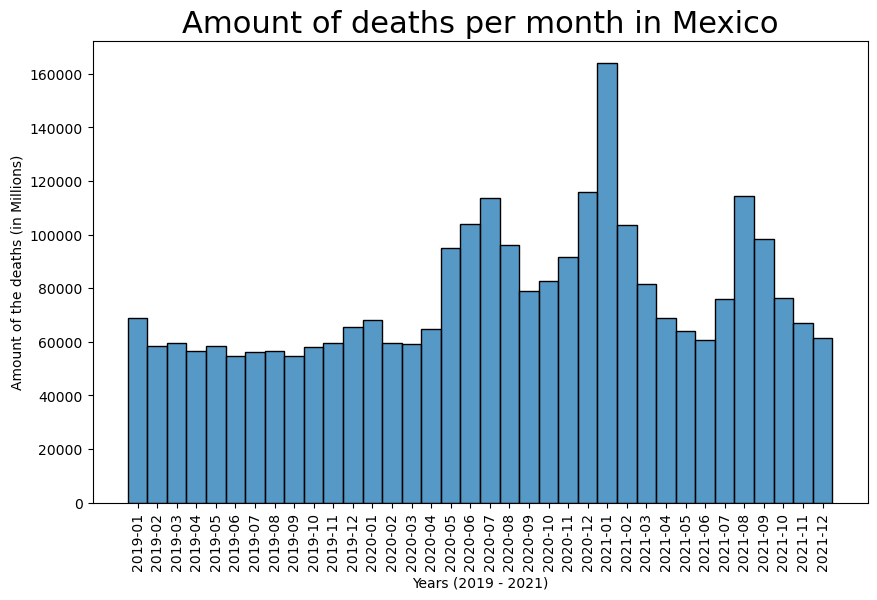

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['year_month'].sort_values(), bins=36, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Years (2019 - 2021)')
plt.ylabel('Amount of the deaths (in Millions)')
plt.title('Amount of deaths per month in Mexico', fontsize=22)
plt.show()
     

### II. Histogram of 'time_of_death_norm' column

In [21]:
df

,index,date,time_of_death,time_of_death_in_seconds,time_of_death_norm,cause_of_death,cause_of_death_name,state,month,specific_cause_of_death,year_month
0,45,2020-01-22,1900-01-01 11:00:00,46800,0.541667,30,Enfermedades cerebrovasculares,1,1,I64X,2020-01
1,46,2020-01-04,1900-01-01 17:20:00,24000,0.277778,38,Enfermedades del aparato urinario,1,1,N185,2020-01
2,47,2020-01-15,1900-01-01 02:30:00,77400,0.895833,12,Tumores malignos de los órganos genitourinarios,1,1,C61X,2020-01
3,48,2020-01-23,1900-01-01 09:21:00,52740,0.610417,38,Enfermedades del aparato urinario,1,1,N179,2020-01
4,49,2020-01-20,1900-01-01 08:20:00,56400,0.652778,35,Enfermedades de otras partes del aparato diges...,1,1,K260,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
2773918,1122243,2021-12-29,1900-01-01 10:00:00,50400,0.583333,6,Enfermedades víricas,32,12,U071,2021-12
2773919,1122244,2021-09-04,1900-01-01 11:00:00,46800,0.541667,6,Enfermedades víricas,32,9,U071,2021-09
2773920,1122245,2021-12-31,1900-01-01 22:05:00,6900,0.079861,6,Enfermedades víricas,32,12,U071,2021-12
2773921,1122246,2021-12-17,1900-01-01 15:20:00,31200,0.361111,6,Enfermedades víricas,32,12,U071,2021-12


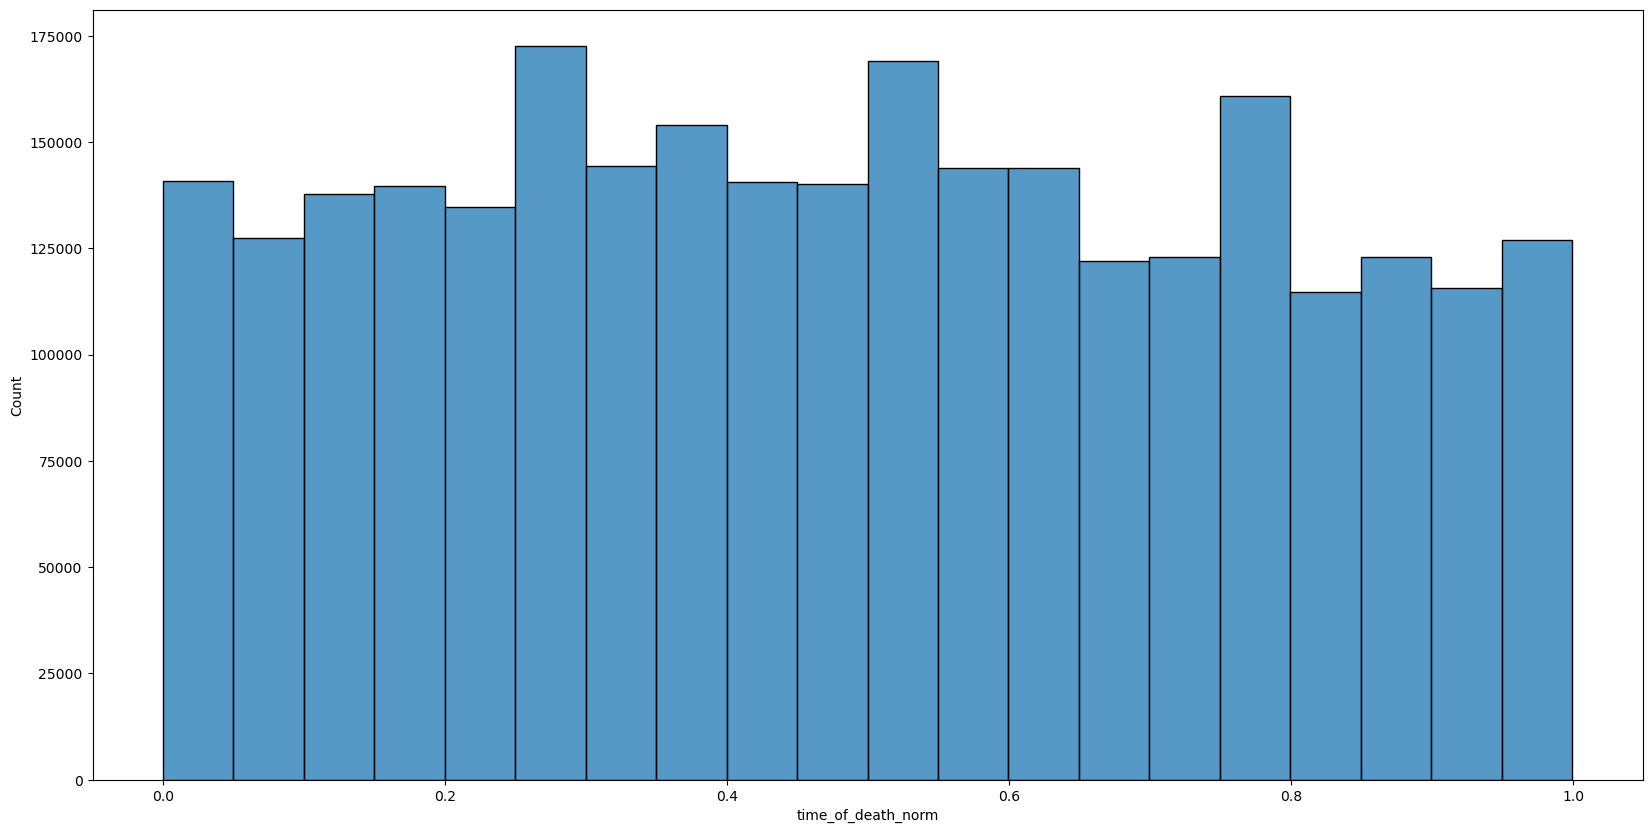

In [22]:
plt.figure(figsize = (20, 10))
sns.histplot(df, x = 'time_of_death_norm', bins = 20)
plt.show()

### III. Histograma del top 10 causas de muerte en méxico

In [23]:
# Variable for plotting
cause_of_death_name_10 = df.groupby('cause_of_death_name').count()
cause_of_death_name_10 = cause_of_death_name_10.sort_values(by = 'index', ascending = False)
cause_of_death_name_10

,index,date,time_of_death,time_of_death_in_seconds,time_of_death_norm,cause_of_death,state,month,specific_cause_of_death,year_month
cause_of_death_name,,,,,,,,,,
Enfermedades víricas,436340,436340,436340,436340,436340,436340,436340,436340,436340,436340
Enfermedades isquémicas del corazón,431251,431251,431251,431251,431251,431251,431251,431251,431251,431251
Enfermedades endocrinas y metabólicas,407892,407892,407892,407892,407892,407892,407892,407892,407892,407892
Otras enfermedades del aparato respiratorio,240501,240501,240501,240501,240501,240501,240501,240501,240501,240501
Enfermedades de otras partes del aparato digestivo,205535,205535,205535,205535,205535,205535,205535,205535,205535,205535
Enfermedades cerebrovasculares,103476,103476,103476,103476,103476,103476,103476,103476,103476,103476
Agresiones,89457,89457,89457,89457,89457,89457,89457,89457,89457,89457
Enfermedades hipertensivas,85999,85999,85999,85999,85999,85999,85999,85999,85999,85999
Tumores malignos de los órganos digestivos,83640,83640,83640,83640,83640,83640,83640,83640,83640,83640


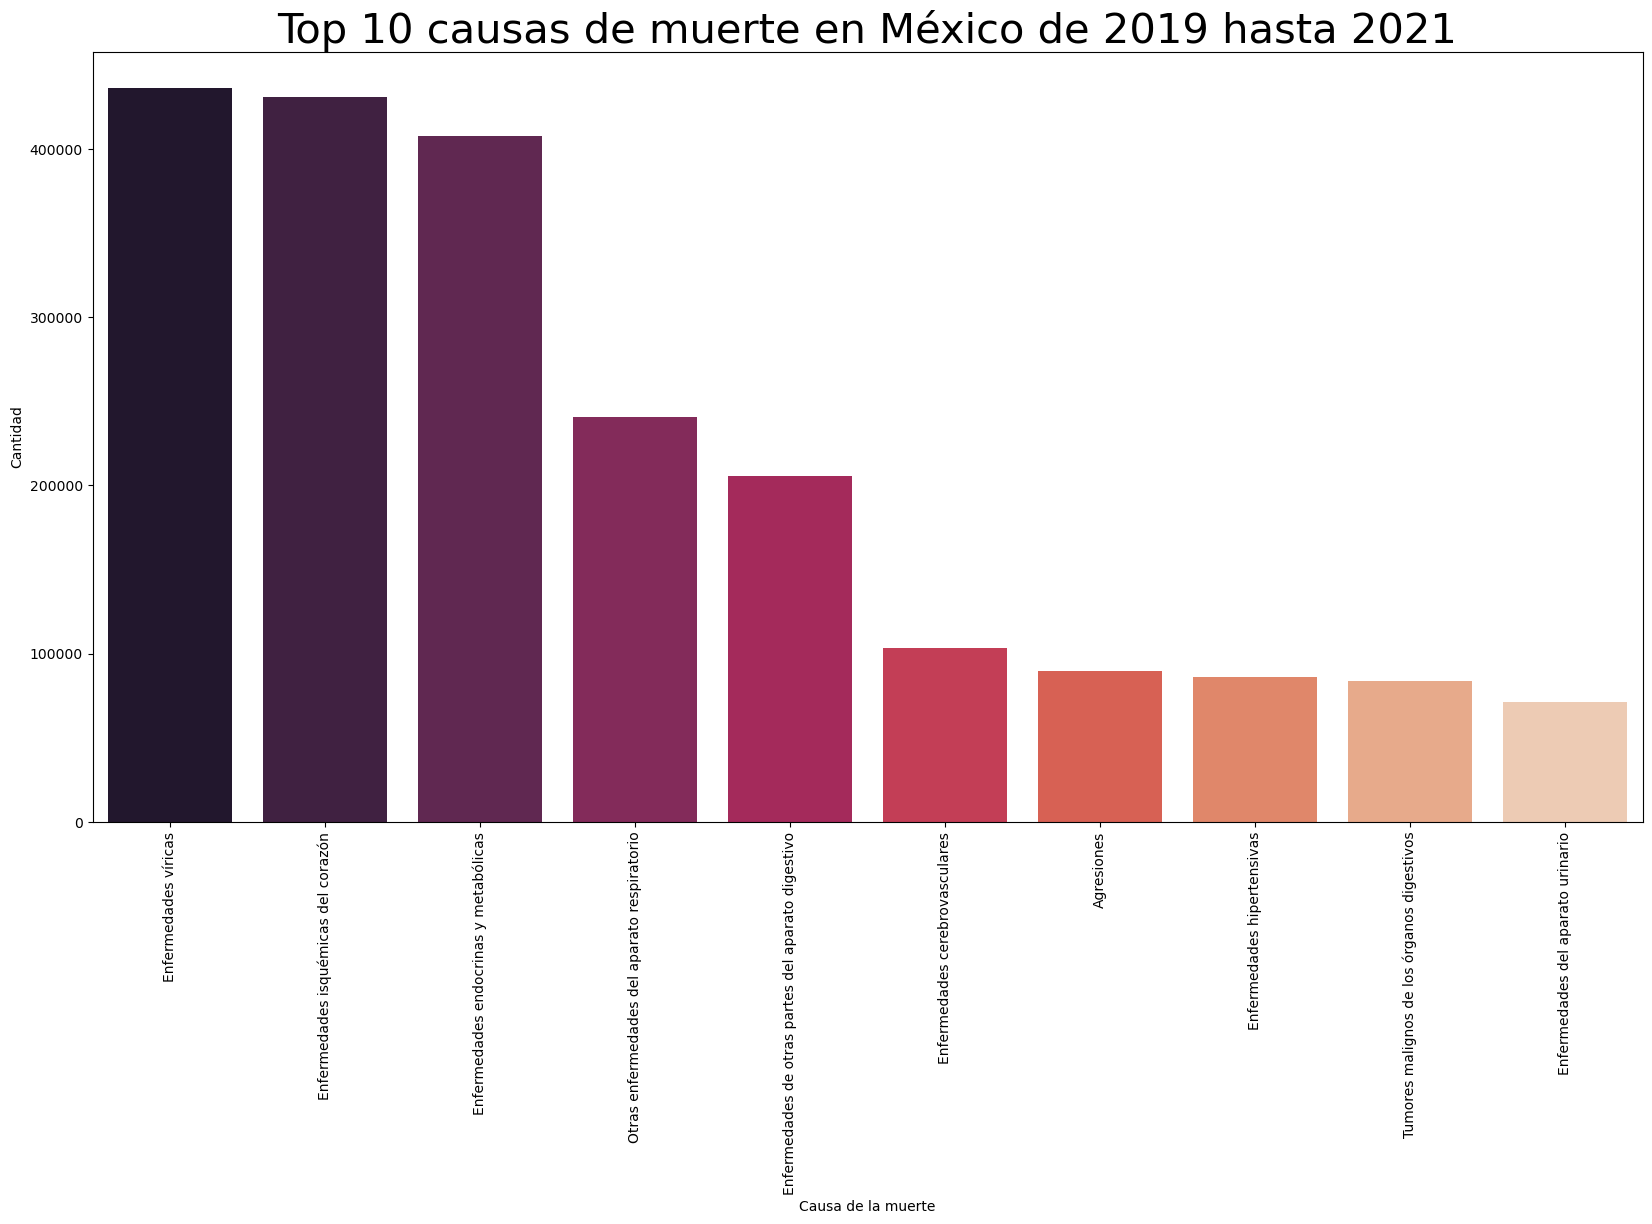

In [24]:
plt.figure(figsize = (20, 10))
sns.barplot(x = cause_of_death_name_10['index'].nlargest(10).index, y = cause_of_death_name_10['index'].nlargest(10), palette = 'rocket')
plt.xlabel('Causa de la muerte')
plt.ylabel('Cantidad')
plt.title('Top 10 causas de muerte en México de 2019 hasta 2021', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

### IV. Histograma de muertes por estado

In [25]:
# Read states of mexico dataset
states_mex = pd.read_csv('paises.csv')
states_mex

,cve,descrip
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila de Zaragoza
...,...,...
253,535,República de Fiji
254,888,No aplica
255,997,Extranjero sin especificación de país
256,998,Mexicana (no especificado de Entidad Federativa)


In [26]:
states_mex = states_mex.iloc[:32, :]
states_mex

,cve,descrip
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila de Zaragoza
5,6,Colima
6,7,Chiapas
7,8,Chihuahua
8,9,Ciudad de México
9,10,Durango


In [27]:
# Join of the two tables
df_states = df.join(states_mex.set_index('cve'), on = 'state')
df_states = df_states.rename(columns={'descrip': 'state_name'})
df_states

,index,date,time_of_death,time_of_death_in_seconds,time_of_death_norm,cause_of_death,cause_of_death_name,state,month,specific_cause_of_death,year_month,state_name
0,45,2020-01-22,1900-01-01 11:00:00,46800,0.541667,30,Enfermedades cerebrovasculares,1,1,I64X,2020-01,Aguascalientes
1,46,2020-01-04,1900-01-01 17:20:00,24000,0.277778,38,Enfermedades del aparato urinario,1,1,N185,2020-01,Aguascalientes
2,47,2020-01-15,1900-01-01 02:30:00,77400,0.895833,12,Tumores malignos de los órganos genitourinarios,1,1,C61X,2020-01,Aguascalientes
3,48,2020-01-23,1900-01-01 09:21:00,52740,0.610417,38,Enfermedades del aparato urinario,1,1,N179,2020-01,Aguascalientes
4,49,2020-01-20,1900-01-01 08:20:00,56400,0.652778,35,Enfermedades de otras partes del aparato diges...,1,1,K260,2020-01,Aguascalientes
...,...,...,...,...,...,...,...,...,...,...,...,...
2773918,1122243,2021-12-29,1900-01-01 10:00:00,50400,0.583333,6,Enfermedades víricas,32,12,U071,2021-12,Zacatecas
2773919,1122244,2021-09-04,1900-01-01 11:00:00,46800,0.541667,6,Enfermedades víricas,32,9,U071,2021-09,Zacatecas
2773920,1122245,2021-12-31,1900-01-01 22:05:00,6900,0.079861,6,Enfermedades víricas,32,12,U071,2021-12,Zacatecas
2773921,1122246,2021-12-17,1900-01-01 15:20:00,31200,0.361111,6,Enfermedades víricas,32,12,U071,2021-12,Zacatecas


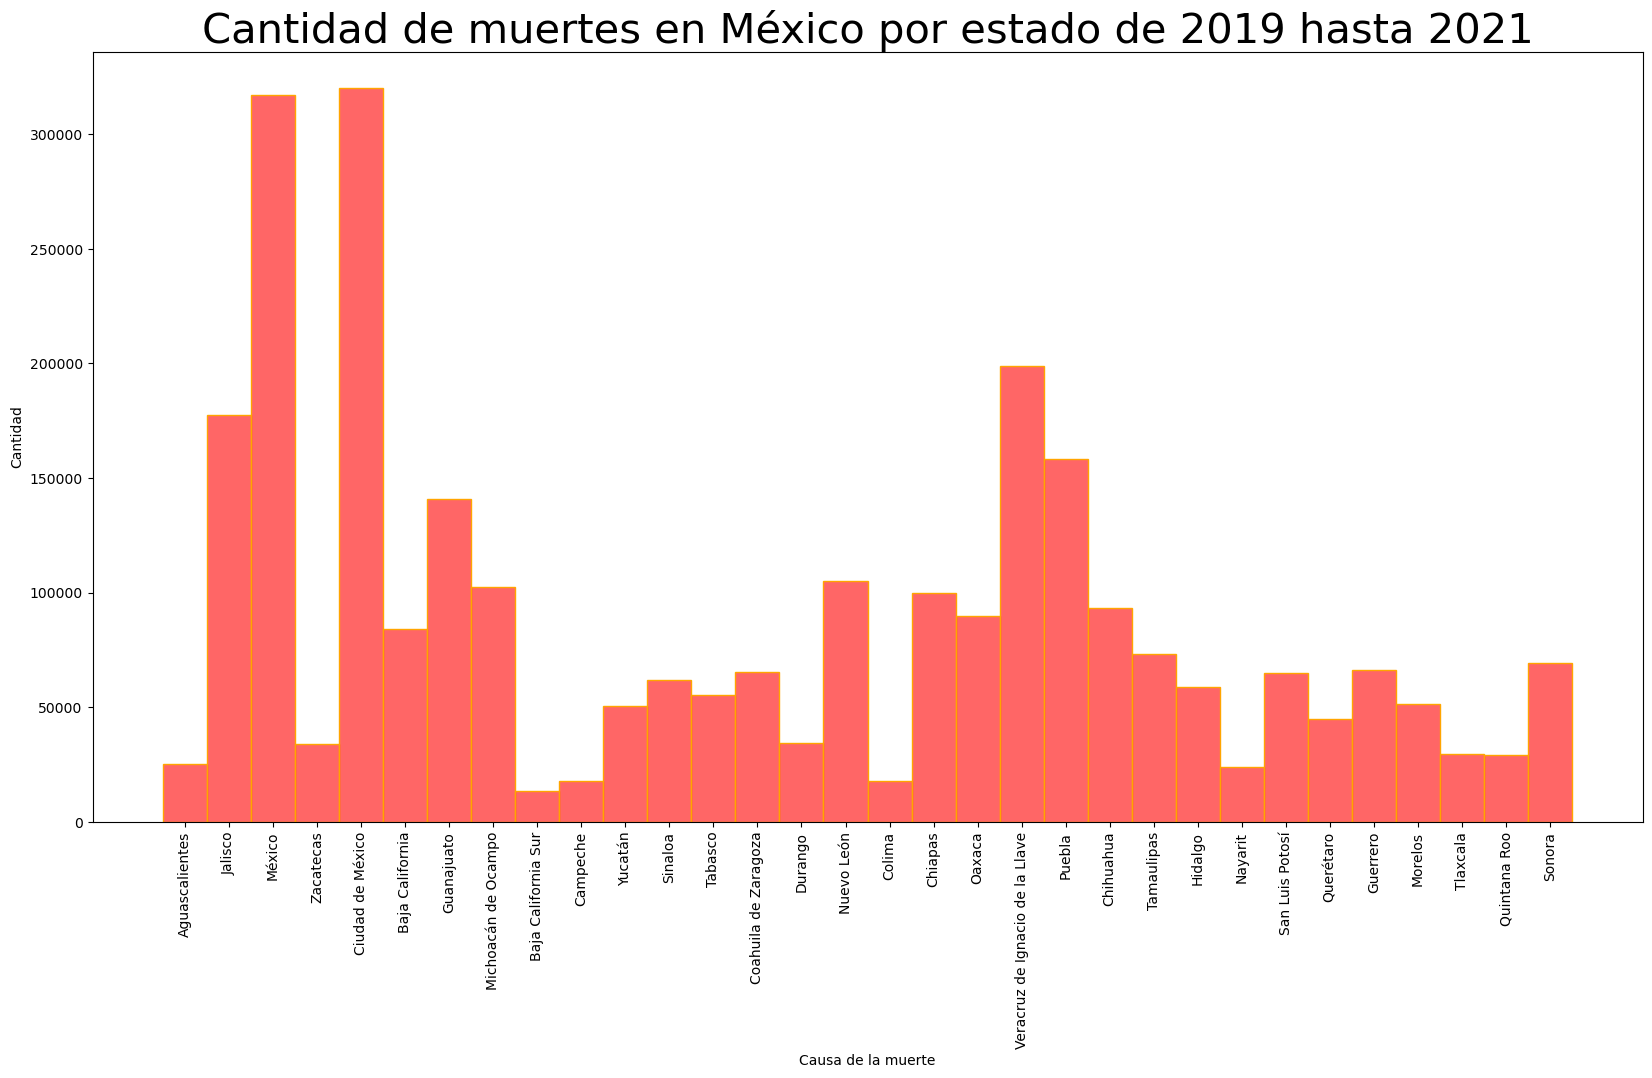

In [29]:
plt.figure(figsize = (20, 10))
sns.histplot(df_states, x = 'state_name', color = "red", alpha = 0.6, edgecolor = 'orange')
plt.xlabel('Causa de la muerte')
plt.ylabel('Cantidad')
plt.title('Cantidad de muertes en México por estado de 2019 hasta 2021', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

### V. Histograma de muertes por estado cada año

In [39]:
df_states['year'] = df['date'].dt.to_period('Y').astype(str)
df_states['year'] = df_states['year'].apply(pd.to_numeric)
df_states['year']

0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
2773918    2021
2773919    2021
2773920    2021
2773921    2021
2773922    2021
Name: year, Length: 2773923, dtype: int64

In [40]:
df_states['year'].unique()

array([2020, 2019, 2021], dtype=int64)

In [43]:
df_states['year'].isna().sum()

0

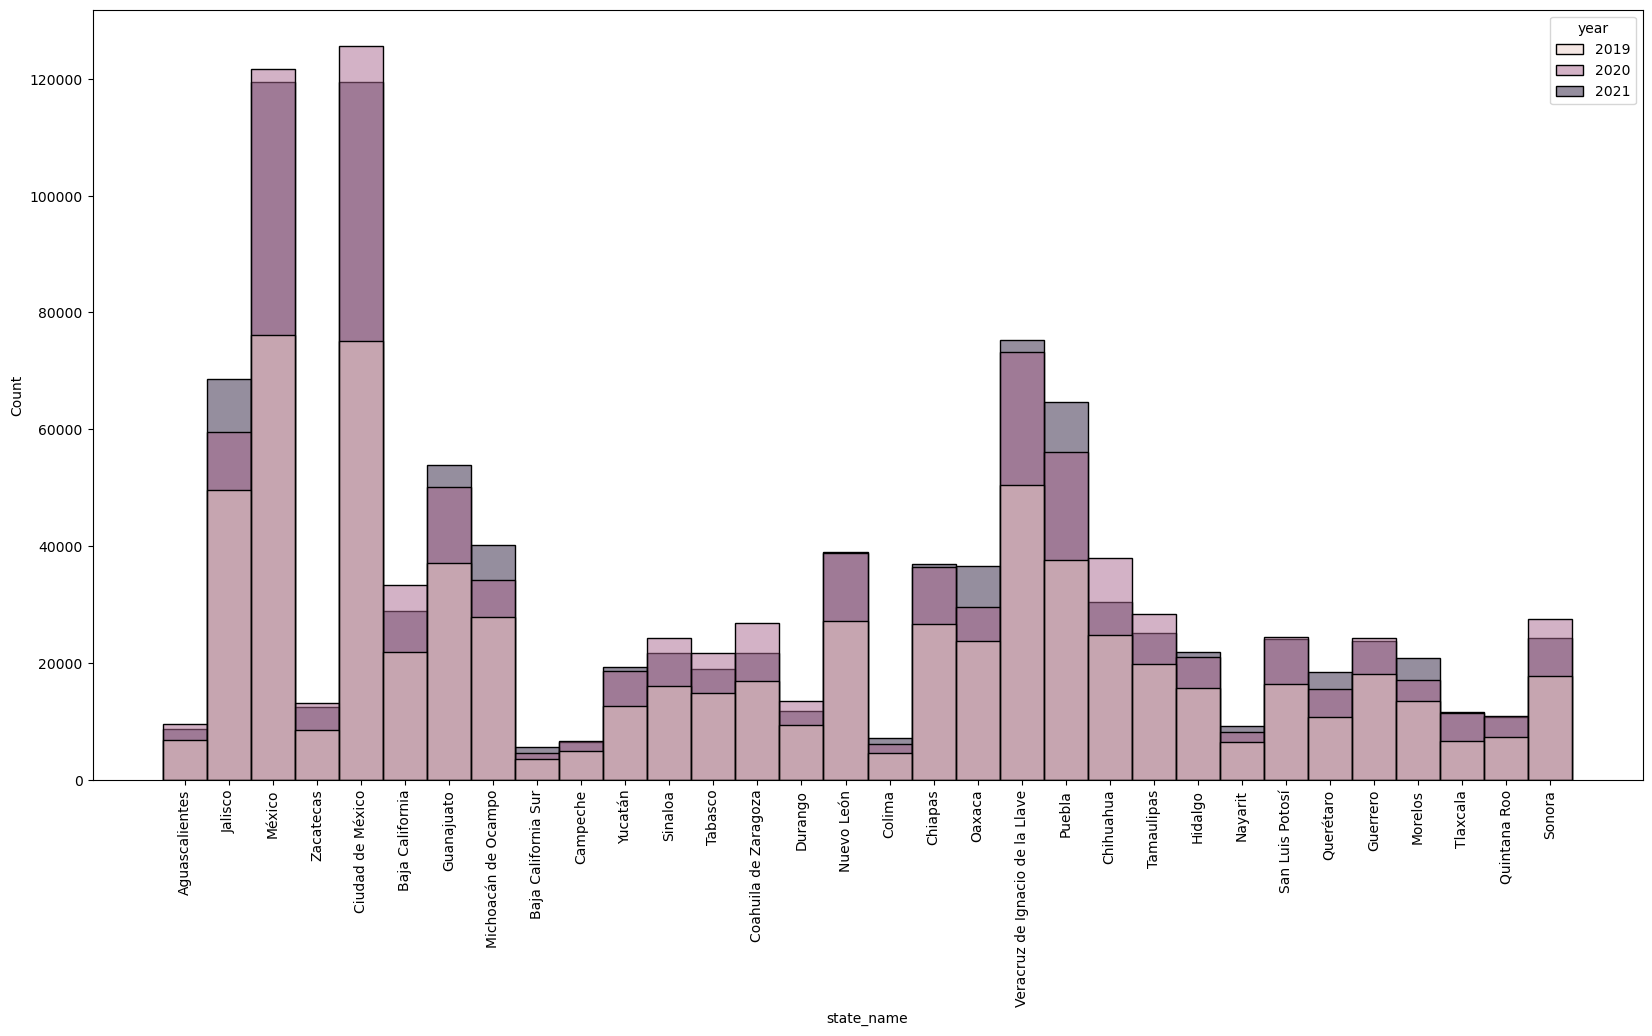

In [41]:
plt.figure(figsize = (20, 10))
sns.histplot(df_states, x = 'state_name', hue = 'year')
plt.xticks(rotation = 90)
plt.show()

### VI. Histograma de mesescon más fallecidos en México de 2019 a 2021

In [76]:
#df_states['month'] = df_states.loc['month']
months_name = [x for x in calendar.month_name if x]
print(months_name)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [68]:
months_df = pd.DataFrame({'index':list(range(1, 13)),
             'month_name':months_name})
months_df

,index,month_name
0,1,January
1,2,February
2,3,March
3,4,April
4,5,May
5,6,June
6,7,July
7,8,August
8,9,September
9,10,October


In [85]:
#join months to df
df_states = df_states.join(months_df.set_index('index'), on = 'month')
df_states

ValueError: columns overlap but no suffix specified: Index(['month_name'], dtype='object')

In [72]:
df_states = df_states.drop(columns = ['months'])
df_states

,index,date,time_of_death,time_of_death_in_seconds,time_of_death_norm,cause_of_death,cause_of_death_name,state,month,specific_cause_of_death,year_month,state_name,year,month_name
0,45,2020-01-22,1900-01-01 11:00:00,46800,0.541667,30,Enfermedades cerebrovasculares,1,1,I64X,2020-01,Aguascalientes,2020,January
1,46,2020-01-04,1900-01-01 17:20:00,24000,0.277778,38,Enfermedades del aparato urinario,1,1,N185,2020-01,Aguascalientes,2020,January
2,47,2020-01-15,1900-01-01 02:30:00,77400,0.895833,12,Tumores malignos de los órganos genitourinarios,1,1,C61X,2020-01,Aguascalientes,2020,January
3,48,2020-01-23,1900-01-01 09:21:00,52740,0.610417,38,Enfermedades del aparato urinario,1,1,N179,2020-01,Aguascalientes,2020,January
4,49,2020-01-20,1900-01-01 08:20:00,56400,0.652778,35,Enfermedades de otras partes del aparato diges...,1,1,K260,2020-01,Aguascalientes,2020,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773918,1122243,2021-12-29,1900-01-01 10:00:00,50400,0.583333,6,Enfermedades víricas,32,12,U071,2021-12,Zacatecas,2021,December
2773919,1122244,2021-09-04,1900-01-01 11:00:00,46800,0.541667,6,Enfermedades víricas,32,9,U071,2021-09,Zacatecas,2021,September
2773920,1122245,2021-12-31,1900-01-01 22:05:00,6900,0.079861,6,Enfermedades víricas,32,12,U071,2021-12,Zacatecas,2021,December
2773921,1122246,2021-12-17,1900-01-01 15:20:00,31200,0.361111,6,Enfermedades víricas,32,12,U071,2021-12,Zacatecas,2021,December


In [ ]:
df_states['month_name'] = pd.Categorical(df_states['month_name'], months_name)


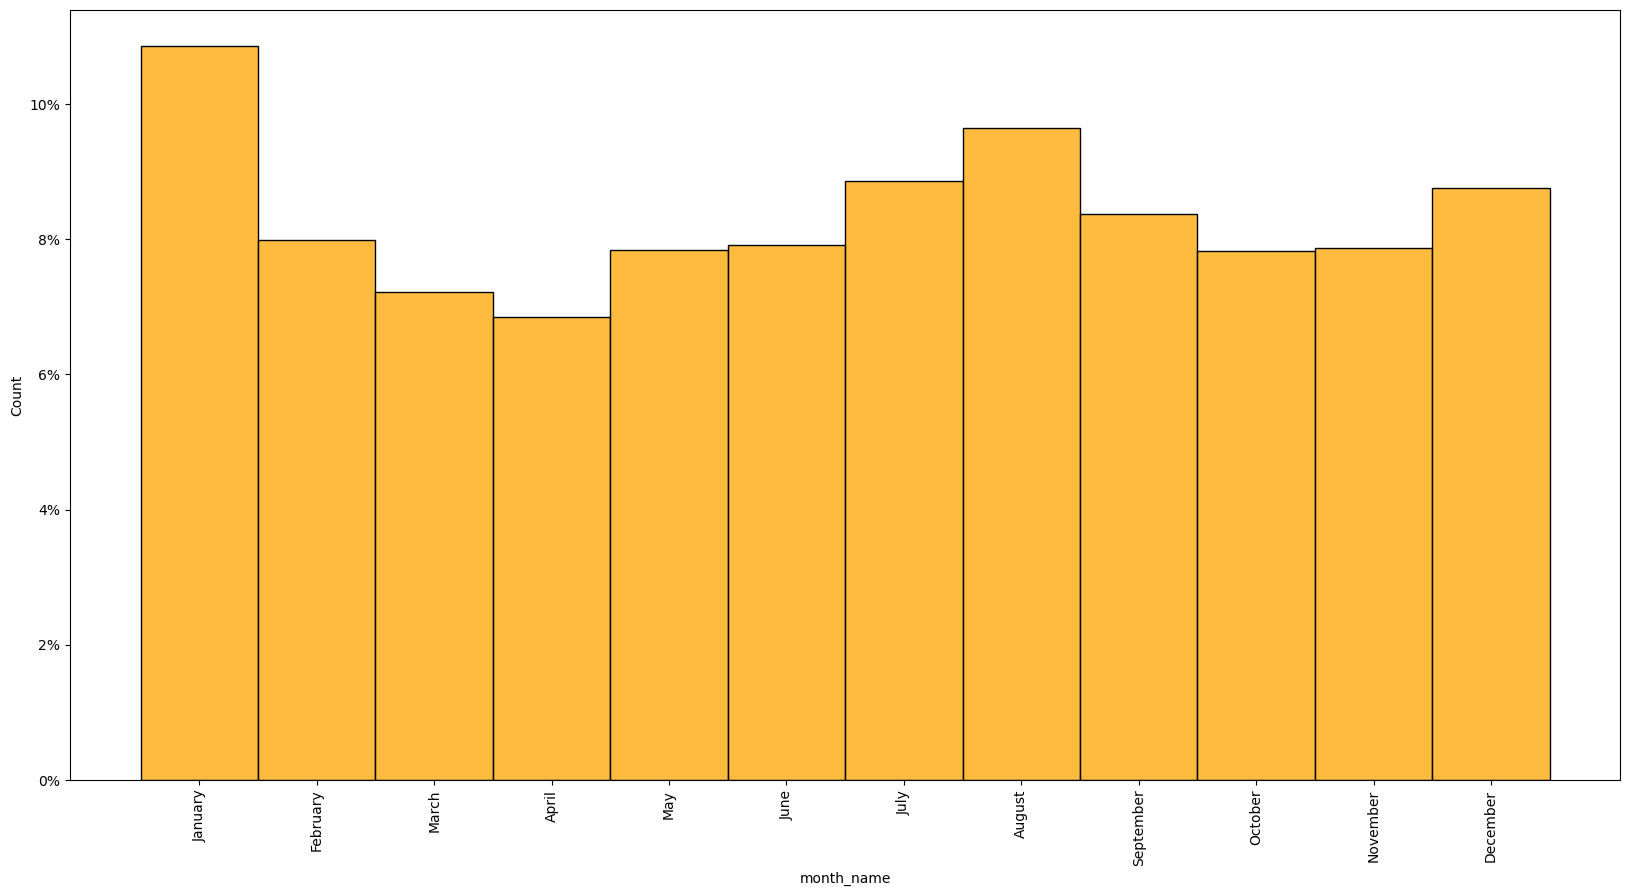

In [86]:
from matplotlib.ticker import PercentFormatter

plt.figure(figsize = (20, 10))
sns.histplot(df_states, x = 'month_name', color = 'orange', weights=np.ones(len(df_states)) / len(df_states))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.xticks(rotation = 90)
plt.show()